# Linear Regression
one or more independent input variable and one continous output variable

model trained by ordinary least square(OLS) method

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [207]:
week_data = [1,2,3,4,5]
sales_data=[2,4,5,4,5]
df = pd.DataFrame({'Week': week_data, 'Sales': sales_data})
df

,Week,Sales
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [208]:
X=df['Week'].values
Y=df['Sales'].values

In [209]:
X

array([1, 2, 3, 4, 5], dtype=int64)

In [210]:
Y

array([2, 4, 5, 4, 5], dtype=int64)

In [211]:
mean_x=np.mean(X)
mean_y=np.mean(Y)

In [212]:
print(mean_x,mean_y)

3.0 4.0


In [213]:
n=len(df)
numerator=denominator=0
for i in range(n):
    numerator+=(X[i]-mean_x)*(df['Sales'][i]-mean_y)
    denominator+=(X[i]-mean_x)**2

m=numerator/denominator
m

0.6

In [214]:
# c=y-mx
c=mean_y-m*mean_x
c

2.2

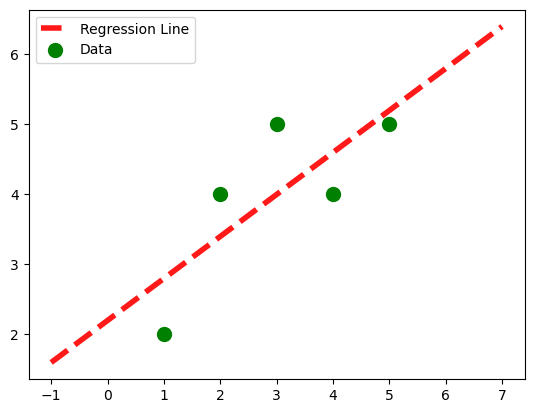

In [215]:
max_x=np.max(X)+2
min_x=np.min(X)-2

x=np.linspace(min_x,max_x)
y=m*x + c

plt.plot(x,y,alpha=0.9,label='Regression Line',color='red',linestyle='--',linewidth=4)
plt.scatter(X,Y,color='green', label='Data', s=100)

plt.legend(loc='best')

In [216]:
tss=0
rss=0

for i in range(n):
    tss+=(Y[i] - mean_y)**2
    rss+=(m*X[i]+c - Y[i])**2

r2=1-(rss/tss)
r2

0.6000000000000001

In [217]:
rmse=np.sqrt(rss/n)
rmse

0.6928203230275508

In [218]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [219]:
X=X.reshape((n,1))
X

array([[1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [220]:
reg=LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [221]:
y_pred = m*X+c
mse=mean_squared_error(Y,y_pred)
r2_score=reg.score(X,Y)
r2_score


0.6000000000000001

In [222]:
np.sqrt(mse) #rmse

0.6928203230275508

# Real example using dataset

In [223]:
data=pd.read_csv("brain_vol_vs_weight_dataset.csv")
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [224]:
X=data["Head Size(cm^3)"].values
Y=data["Brain Weight(grams)"].values

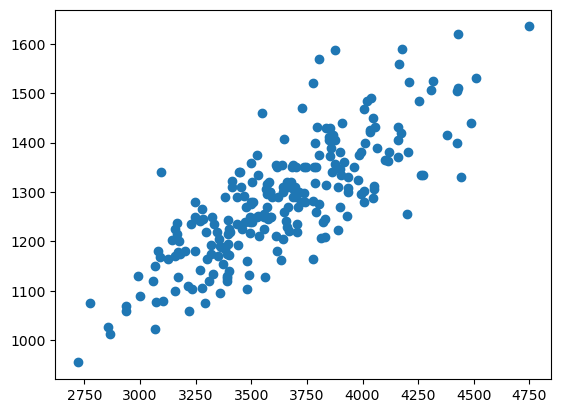

In [225]:
plt.scatter(X,Y)

In [226]:
# relation is kind of linear so linear regression can be implemeted
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [227]:
X=X.reshape(-1,1)
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)

In [228]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [229]:
lr.predict([[3777]])

array([1322.26909306])

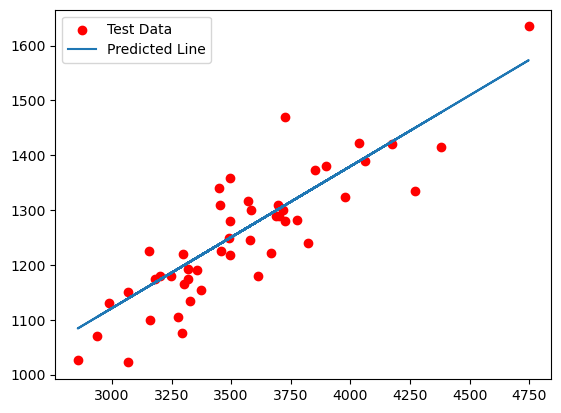

In [230]:
y_pred=lr.predict(x_test)
plt.scatter(x_test,y_test, label='Test Data', color='red')
plt.plot(x_test, y_pred, label='Predicted Line')
plt.legend()

In [231]:
mse=mean_squared_error(y_test,y_pred)
np.sqrt(mse)

60.104094824719716

In [232]:
r2=r2_score(y_test,y_pred)
r2

0.7480498911684001

# Logistic regression
predicts discrete values(categories)

one or more independent input variables and one or more discrete outputs(categories)

we do not fit a line
rather we fit a curve

model trained by maximum likelihood estimation(MLE)

### Analysis of a real dataset

In [233]:
import pandas as pd
import numpy as np
df=pd.read_csv("HR_capstone_dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [234]:
df.shape

(14999, 10)

In [235]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [236]:
# attrition analysis
left=df[df.left==1]
left.shape

(3571, 10)

In [237]:
retained=df[df.left==0]
retained.shape

(11428, 10)

In [238]:
at_rate=3571/14999*100
at_rate

23.80825388359224

In [239]:
# 23% people left the organisation
df.drop(columns=['Department','salary']).groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [240]:
#analysis
# 1. satisfaction level of people who left is low
# 2. num of projects given to people left was higher
# 3. avg onthly hours of work of the people who left was more
# 4. promotion in last 5 years was less for those who left

<Axes: xlabel='salary'>

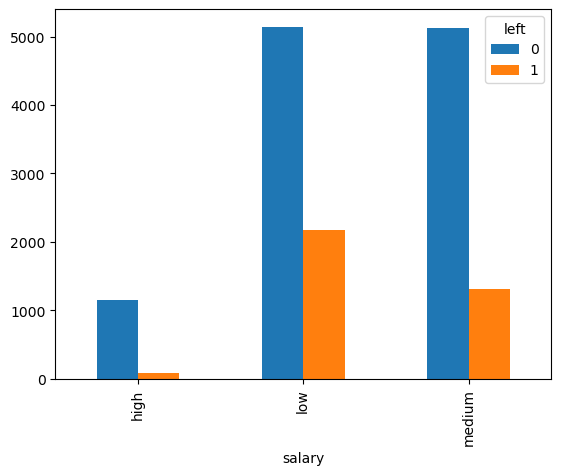

In [241]:
# effect of salary on retention
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

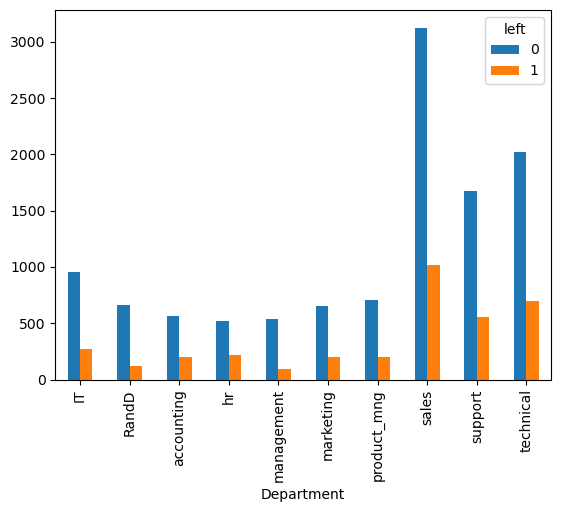

In [242]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

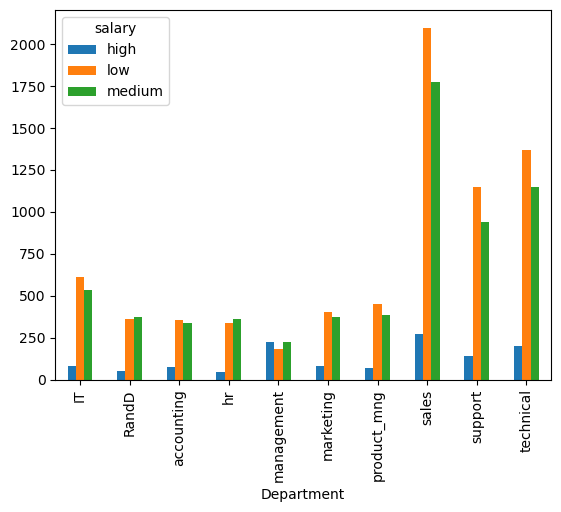

In [243]:
pd.crosstab(df.Department,df.salary).plot(kind='bar')

### Binary Classification

In [244]:
# factors affecting attrition
# salary
# avg monthly hours
# satisfation level
# promotion in last 5 years
# department


In [245]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [246]:
subdf=df[['satisfaction_level','average_montly_hours','promotion_last_5years']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years
0,0.38,157,0
1,0.80,262,0
2,0.11,272,0
3,0.72,223,0
4,0.37,159,0


In [247]:
sal_dumy=pd.get_dummies(df.salary,prefix="salary")
dep_dumy=pd.get_dummies(df.Department,prefix='dep')

df_dummies=pd.concat([subdf,sal_dumy,dep_dumy],axis='columns')
# df_dummies.drop('salary',axis='columns',inplace=True)
df_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
0,0.38,157,0,False,True,False,False,False,False,False,False,False,False,True,False,False
1,0.80,262,0,False,False,True,False,False,False,False,False,False,False,True,False,False
2,0.11,272,0,False,False,True,False,False,False,False,False,False,False,True,False,False
3,0.72,223,0,False,True,False,False,False,False,False,False,False,False,True,False,False
4,0.37,159,0,False,True,False,False,False,False,False,False,False,False,True,False,False


In [248]:
X=df_dummies
X[1:2]

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
1,0.8,262,0,False,False,True,False,False,False,False,False,False,False,True,False,False


In [249]:
Y=df.left
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

lr.fit(x_train,y_train)
lr.predict(x_test[12:13])

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0], dtype=int64)

In [251]:
y_test[12:13]

9718    0
Name: left, dtype: int64

In [252]:
lr.score(x_test,y_test)

0.7636666666666667

In [253]:
y_pred=lr.predict(x_test)


In [254]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2245
           1       0.57      0.24      0.34       755

    accuracy                           0.76      3000
   macro avg       0.68      0.59      0.60      3000
weighted avg       0.73      0.76      0.73      3000



In [255]:
# predicting who will leave is more important 
# so 0.54 precision dosen't do
# macro avg is actually seen to judge model accuracy which is 0.60


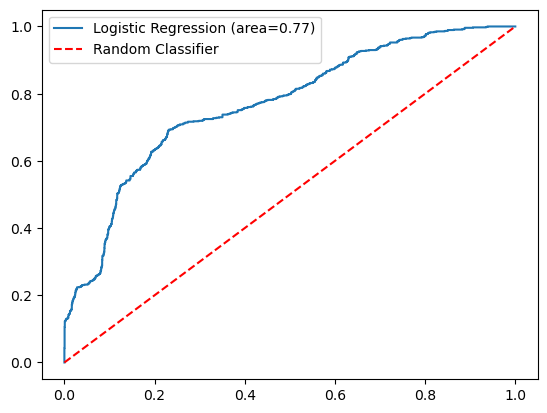

In [256]:
# roc_auc curve
from sklearn.metrics import roc_auc_score, roc_curve
logit_roc_auc= roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])
#false +ve rate, true +ve rate, threshold
fpr, tpr, thr= roc_curve(y_test,lr.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--',label="Random Classifier")
plt.legend(loc='best')


### Categorical Classification

predicting salary - low medium and high

In [257]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [258]:
df.drop(columns='Department').groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


<Axes: xlabel='Department'>

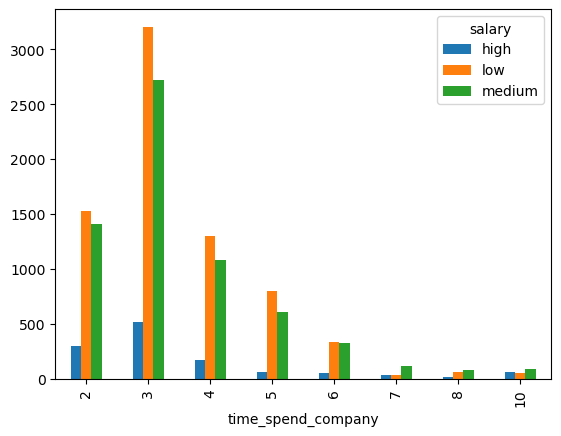

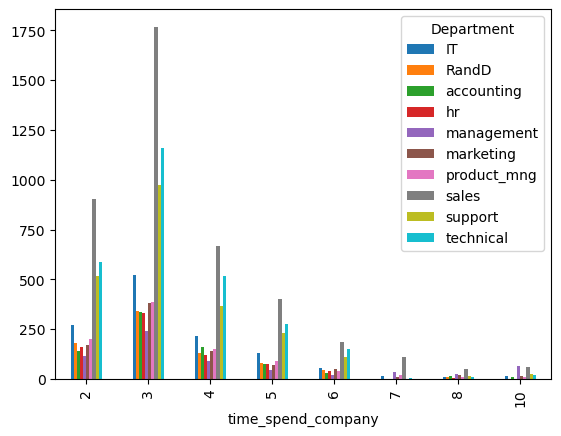

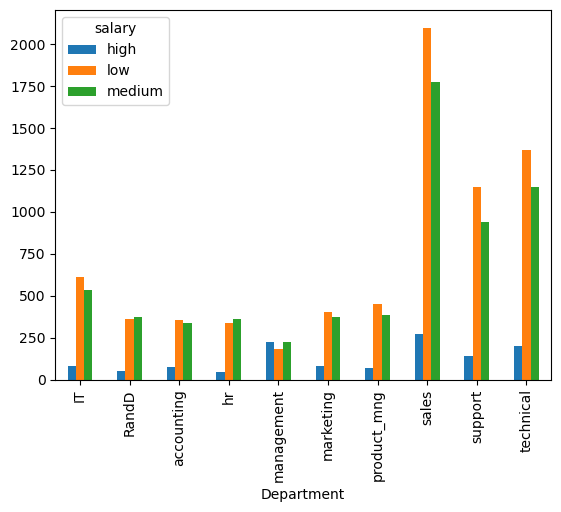

In [259]:
pd.crosstab(df.time_spend_company,df.salary).plot(kind='bar')
pd.crosstab(df.time_spend_company,df.Department).plot(kind='bar')
pd.crosstab(df.Department,df.salary).plot(kind='bar')

In [260]:
df1=df.replace({'salary':{'low':1,'medium':2,'high':3}})
df1.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_4280\1008495953.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1=df.replace({'salary':{'low':1,'medium':2,'high':3}})


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [261]:
df1.groupby('Department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
Department,,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,1.571312
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,1.602287
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,1.629726
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,1.607578
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,2.071429
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,1.624709
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,1.575388
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,1.557971
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,1.549125


<Axes: xlabel='average_montly_hours'>

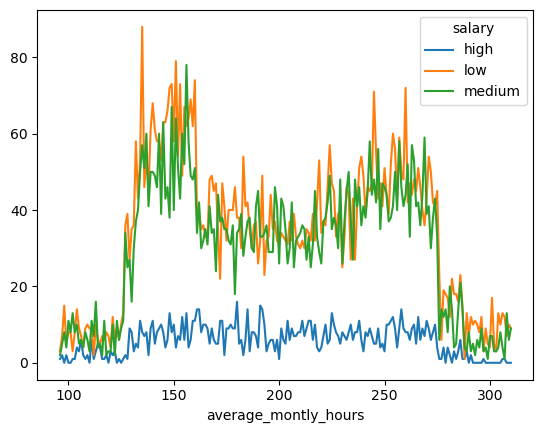

In [262]:
pd.crosstab(df.average_montly_hours,df.salary).plot()

FActors affecting salary
- department
- time spend with the company

In [263]:
dep_dumy=pd.get_dummies(df.Department,prefix='dep')
X=pd.concat([df["time_spend_company"],dep_dumy],axis='columns')
X.head()


,time_spend_company,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
0,3,False,False,False,False,False,False,False,True,False,False
1,6,False,False,False,False,False,False,False,True,False,False
2,4,False,False,False,False,False,False,False,True,False,False
3,5,False,False,False,False,False,False,False,True,False,False
4,3,False,False,False,False,False,False,False,True,False,False


In [264]:
X.shape

(14999, 11)

In [265]:
Y=df.salary
Y.head()
Y.shape

(14999,)

In [266]:
from sklearn.preprocessing import label_binarize
y_bin=label_binarize(Y,classes=['low','medium','high']) # one-hot encoding 
y_bin

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [267]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

In [268]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='ovr')
model.fit(x_train,y_train)

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [269]:
y_pred=model.predict(x_test)

In [270]:
y_pred[10:11]

array(['low'], dtype=object)

In [271]:
y_test[10:11]

5810    low
Name: salary, dtype: object

In [272]:
model.score(x_test,y_test)

0.49566666666666664

In [273]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.35      0.03      0.06       244
         low       0.51      0.89      0.64      1471
      medium       0.44      0.14      0.21      1285

    accuracy                           0.50      3000
   macro avg       0.43      0.35      0.30      3000
weighted avg       0.46      0.50      0.41      3000



In [274]:
y_prob=model.predict_proba(x_test)
y_prob

array([[0.05731417, 0.52946505, 0.41322078],
       [0.06199285, 0.53007246, 0.40793469],
       [0.0560356 , 0.45722079, 0.48674361],
       ...,
       [0.09206168, 0.45332127, 0.45461705],
       [0.06334735, 0.51940596, 0.4172467 ],
       [0.07718973, 0.51252279, 0.41028748]])

leave the roc-auc curve and score for multiclass classification for now